## Task 5 - Exploratory Data Analysis : Sports (Indian Premier League)
### Name-Pradyumna Rajendra Mangave
#### Data Science And Business Analytics Intern @TSF
##### Dataset : https://bit.ly/34SRn3b

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing data
Match_Data = pd.read_csv('matches.csv')
Match_Data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [3]:
#Understanding the data

In [4]:
Match_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [5]:
Match_Data.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [6]:
Match_Data.isnull().any()

id                 False
season             False
city                True
date               False
team1              False
team2              False
toss_winner        False
toss_decision      False
result             False
dl_applied         False
winner              True
win_by_runs        False
win_by_wickets     False
player_of_match     True
venue              False
umpire1             True
umpire2             True
umpire3             True
dtype: bool

In [7]:
#getting count of null values
print(Match_Data['city'].isnull().sum())
print(Match_Data['winner'].isnull().sum())
print(Match_Data['player_of_match'].isnull().sum())
print(Match_Data['umpire1'].isnull().sum())
print(Match_Data['umpire2'].isnull().sum())
print(Match_Data['umpire3'].isnull().sum())

7
4
4
2
2
637


In [8]:
#dropping 'umpire 3' column because it have approximately 90% of null data
Match_Data = Match_Data.drop(columns=["umpire3"],axis=1)
Match_Data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN


In [9]:
#importing deliveries data
Deliveries_Data = pd.read_csv('deliveries.csv')
Deliveries_Data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [10]:
Deliveries_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [11]:
Deliveries_Data.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


In [12]:
Deliveries_Data.isnull().any()

match_id            False
inning              False
batting_team        False
bowling_team        False
over                False
ball                False
batsman             False
non_striker         False
bowler              False
is_super_over       False
wide_runs           False
bye_runs            False
legbye_runs         False
noball_runs         False
penalty_runs        False
batsman_runs        False
extra_runs          False
total_runs          False
player_dismissed     True
dismissal_kind       True
fielder              True
dtype: bool

In [13]:
#combining data
season_data=Match_Data[['id','season','winner']]
complete_data=Deliveries_Data.merge(season_data,how='inner',left_on='match_id',right_on='id')
complete_data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,id,season,winner
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,NaN,NaN,NaN,1,2017,Sunrisers Hyderabad
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,NaN,NaN,NaN,1,2017,Sunrisers Hyderabad
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,4,0,4,NaN,NaN,NaN,1,2017,Sunrisers Hyderabad
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,NaN,NaN,NaN,1,2017,Sunrisers Hyderabad
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,2,2,NaN,NaN,NaN,1,2017,Sunrisers Hyderabad


### Exploratory Data Analysis

(array([ 0., 10., 20., 30., 40., 50., 60., 70., 80.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

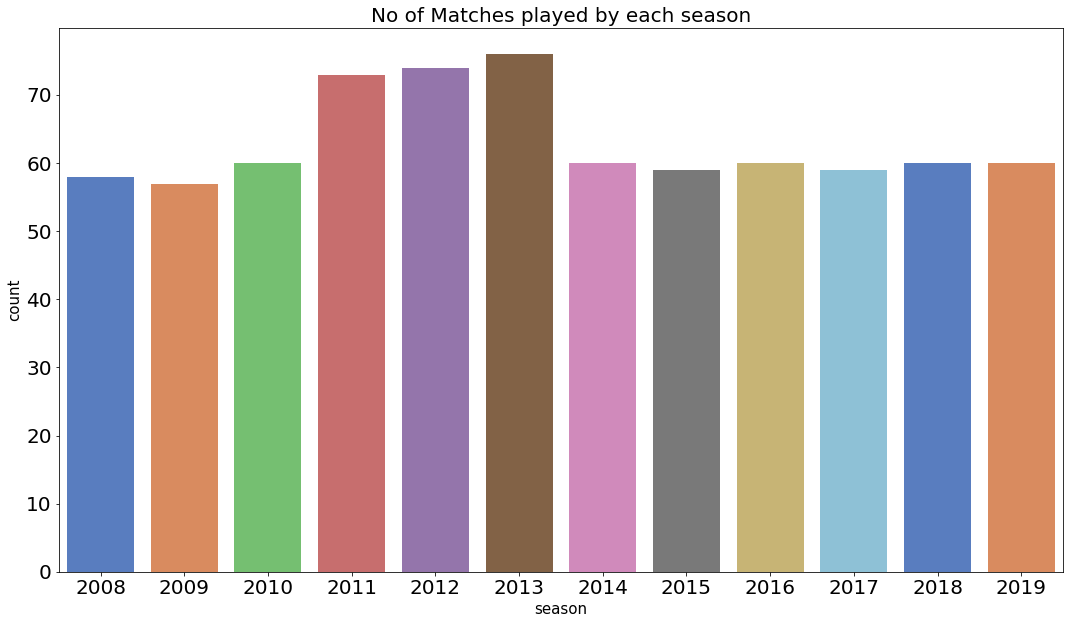

In [17]:
#we will print number of matches played in each season
plt.figure(figsize=(18,10))
sns.countplot('season',data=Match_Data, palette='muted')
plt.title('No of Matches played by each season',fontsize=20)
plt.xlabel('season',fontsize=15)
plt.ylabel('count',fontsize=15)
plt.xticks(size=20)
plt.yticks(size=20)

In [20]:
# The Teams wins IPL trophy
winning_teams_per_season = Match_Data.groupby('season')['winner'].value_counts()
winning_teams_per_season

season  winner                     
2008    Rajasthan Royals               13
        Kings XI Punjab                10
        Chennai Super Kings             9
        Delhi Daredevils                7
        Mumbai Indians                  7
                                       ..
2019    Kings XI Punjab                 6
        Kolkata Knight Riders           6
        Sunrisers Hyderabad             6
        Rajasthan Royals                5
        Royal Challengers Bangalore     5
Name: winner, Length: 100, dtype: int64

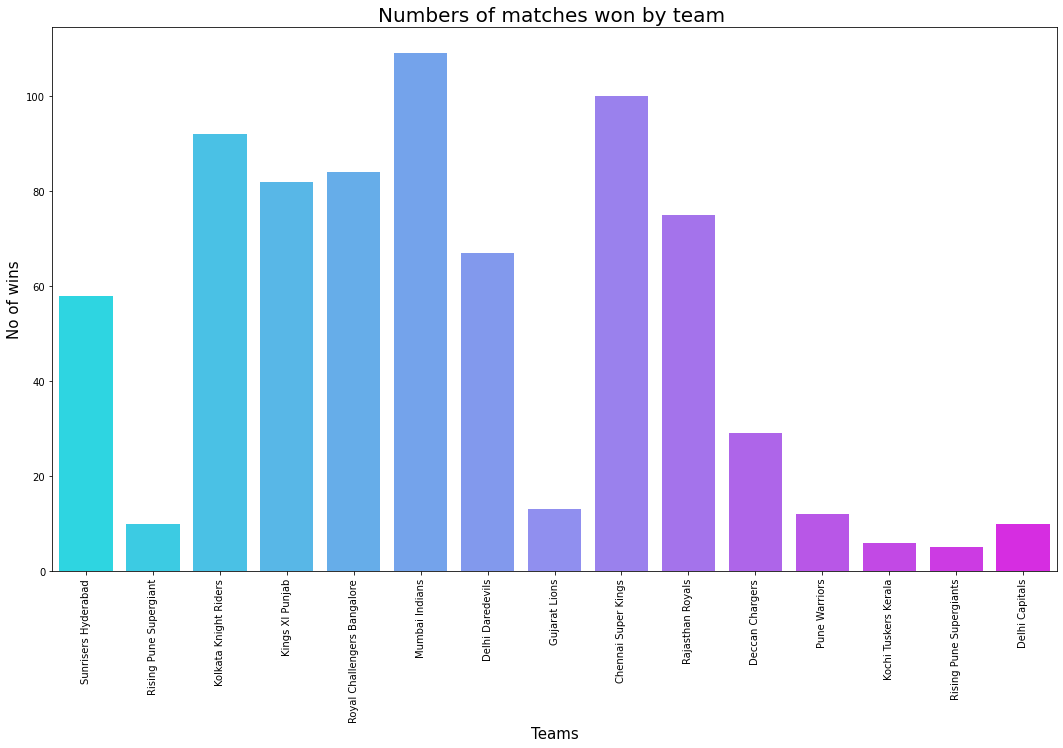

In [21]:
plt.figure(figsize = (18,10))
sns.countplot(x='winner',data=Match_Data, palette='cool')
plt.title("Numbers of matches won by team ",fontsize=20)
plt.xticks(rotation=90)
plt.xlabel("Teams",fontsize=15)
plt.ylabel("No of wins",fontsize=15)
plt.show()

In [22]:
winning_teams = Match_Data[['season','winner']]

In [23]:
winners_team = {}
for i in sorted(winning_teams.season.unique()):
    winners_team[i] = winning_teams[winning_teams.season == i]['winner'].tail(1).values[0]
    
winners_of_IPL = pd.Series(winners_team)
winners_of_IPL = pd.DataFrame(winners_of_IPL, columns=['team'])

Text(0.5, 1.0, 'No of IPL trophy win by Teams')

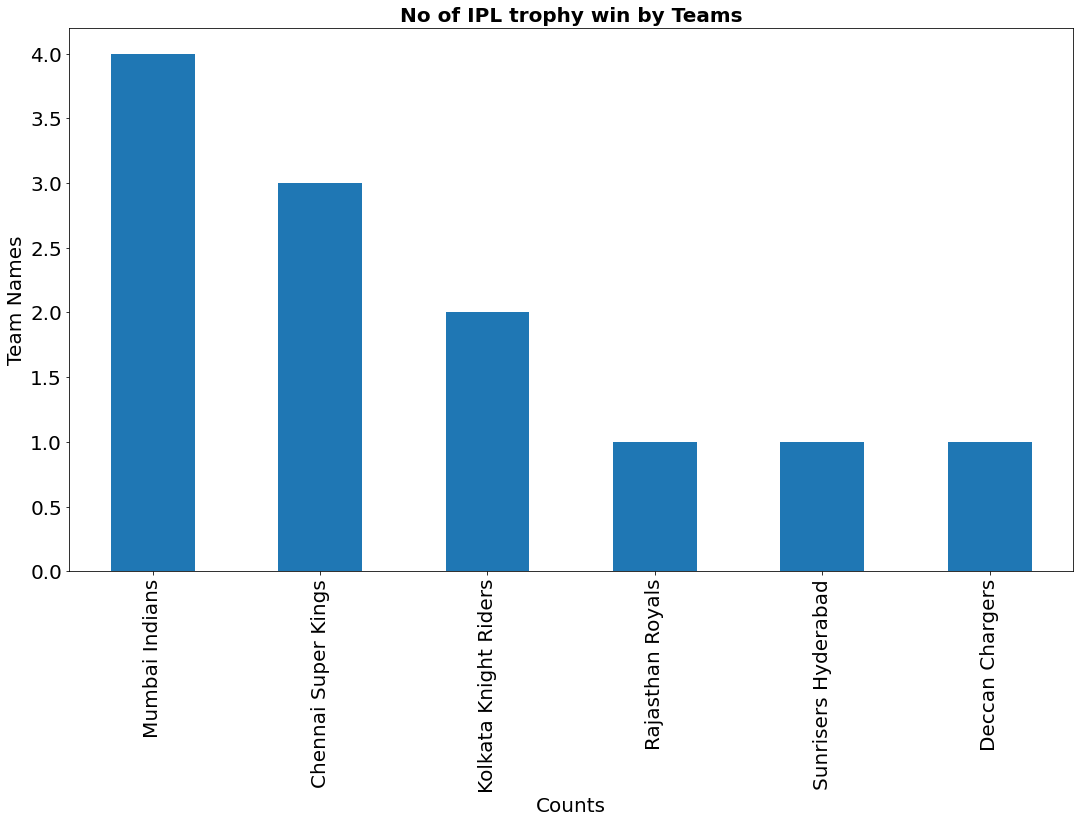

In [24]:
winners_of_IPL['team'].value_counts().plot(kind='bar',figsize=(18,10),fontsize=20)
plt.xlabel('Counts',size=20)
plt.ylabel('Team Names',size=20)
plt.title('No of IPL trophy win by Teams',fontsize=20,fontweight='bold')

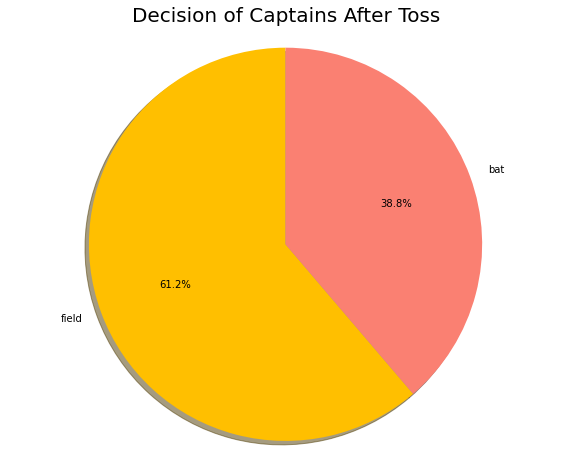

In [25]:
# we will plot pie chart on Toss decision
Toss=Match_Data.toss_decision.value_counts()
labels=np.array(Toss.index)
sizes = Toss.values
colors = ['#FFBF00', '#FA8072']
plt.figure(figsize = (10,8))
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%2.1f%%', shadow=True,startangle=90)
plt.title('Decision of Captains After Toss',fontsize=20)
plt.axis('equal')
plt.show()


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Royal Challengers Bangalore'),
  Text(1, 0, 'Rising Pune Supergiant'),
  Text(2, 0, 'Kolkata Knight Riders'),
  Text(3, 0, 'Kings XI Punjab'),
  Text(4, 0, 'Sunrisers Hyderabad'),
  Text(5, 0, 'Mumbai Indians'),
  Text(6, 0, 'Gujarat Lions'),
  Text(7, 0, 'Delhi Daredevils'),
  Text(8, 0, 'Chennai Super Kings'),
  Text(9, 0, 'Rajasthan Royals'),
  Text(10, 0, 'Deccan Chargers'),
  Text(11, 0, 'Kochi Tuskers Kerala'),
  Text(12, 0, 'Pune Warriors'),
  Text(13, 0, 'Rising Pune Supergiants'),
  Text(14, 0, 'Delhi Capitals')])

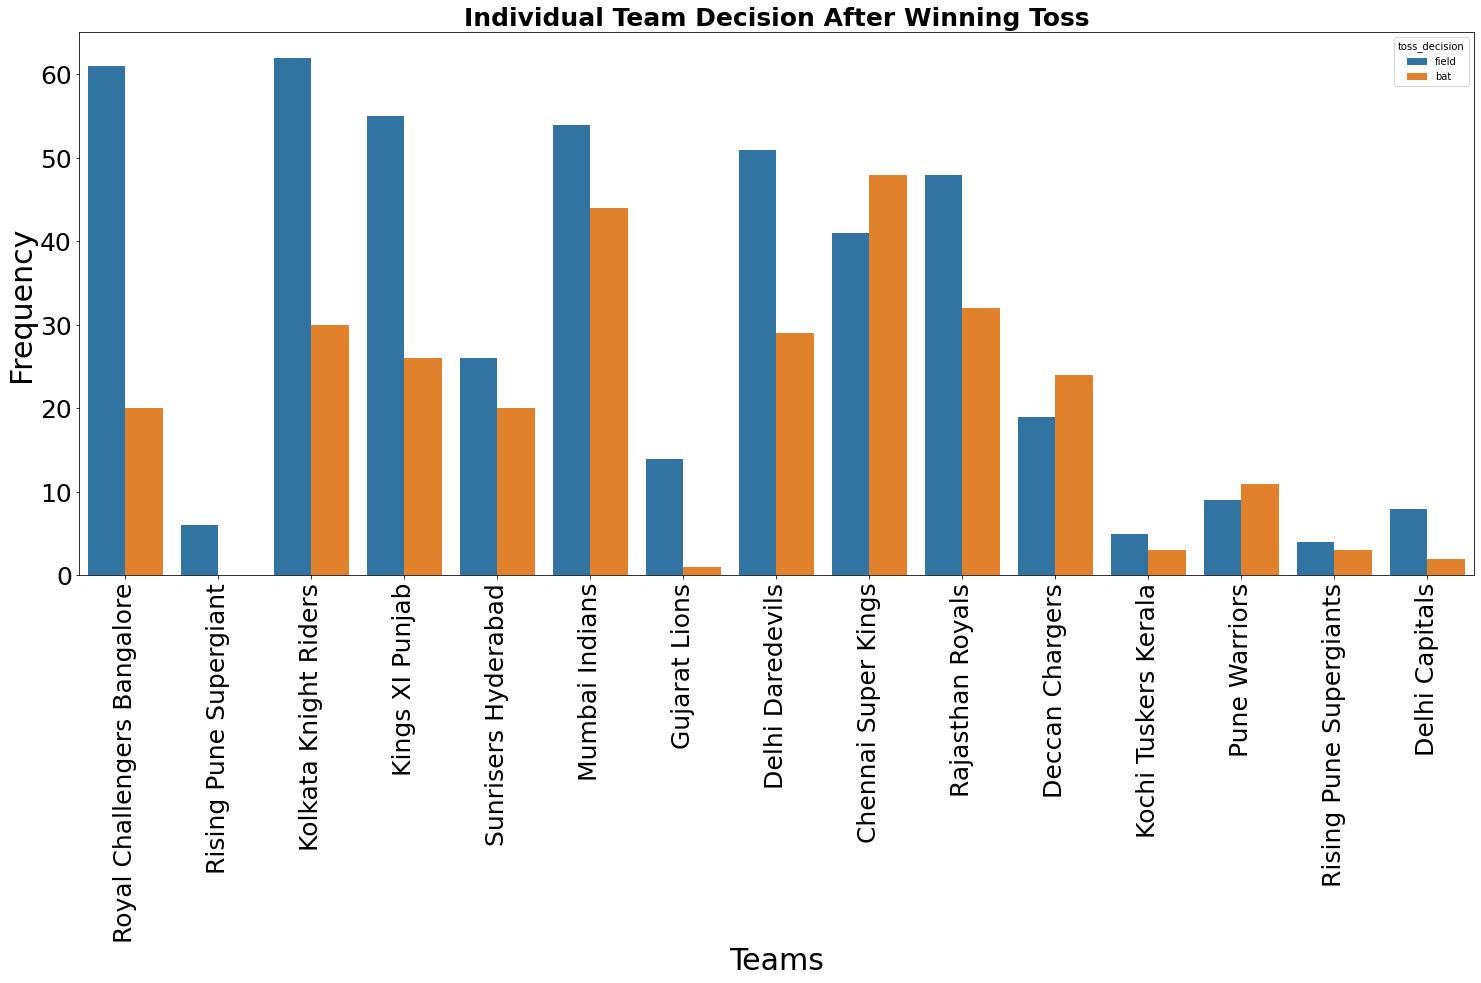

In [45]:
# Individual team decision decision after winning toss
plt.figure(figsize=(25,10))
sns.countplot('toss_winner',data=Match_Data,hue='toss_decision')
plt.title('Individual Team Decision After Winning Toss',fontsize=25,fontweight='bold')
plt.xticks(size=25)
plt.yticks(size=25)
plt.xlabel('Teams',fontsize=30)
plt.ylabel('Frequency',fontsize=30)
plt.xticks(rotation=90)

Text(0, 0.5, 'Frequency')

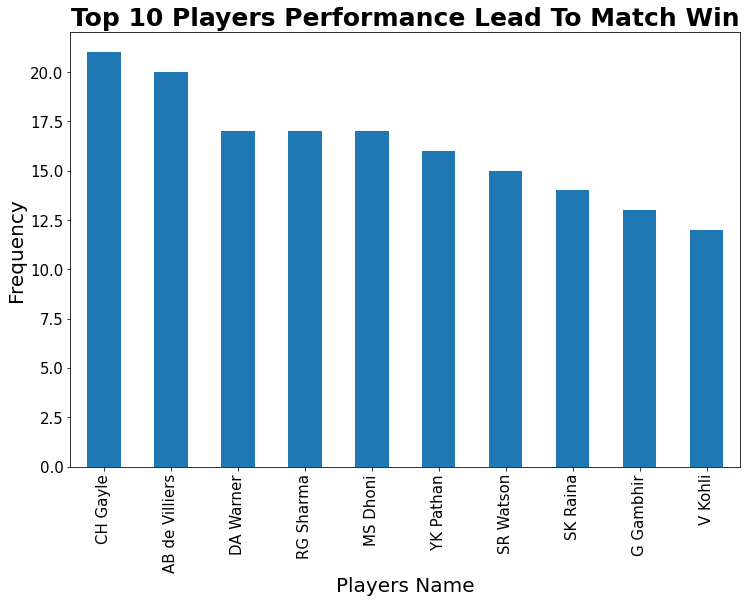

In [47]:
# Top 10 players performace lead to match win
player=Match_Data['player_of_match'].value_counts()
player.head(10).plot(kind='bar',figsize=(12,8),fontsize=15)
plt.title('Top 10 Players Performance Lead To Match Win',fontsize=25,fontweight='bold')
plt.xlabel('Players Name',fontsize=20)
plt.ylabel('Frequency',fontsize=20)

In [82]:
# We will print the top 10 leading run scorer in IPL
batsman_score=Deliveries_Data.groupby('batsman')['batsman_runs'].agg(['sum']).reset_index().sort_values('sum',ascending=False).reset_index(drop=True)
batsman_score=batsman_score.rename(columns={'sum':'batsman_runs'})
print("*** Top 10 Leading Run Scorer in IPL ***")
batsman_score.iloc[:10,:]

*** Top 10 Leading Run Scorer in IPL ***


,batsman,batsman_runs
0,V Kohli,5434
1,SK Raina,5415
2,RG Sharma,4914
3,DA Warner,4741
4,S Dhawan,4632
5,CH Gayle,4560
6,MS Dhoni,4477
7,RV Uthappa,4446
8,AB de Villiers,4428
9,G Gambhir,4223


(array([   0., 1000., 2000., 3000., 4000., 5000., 6000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

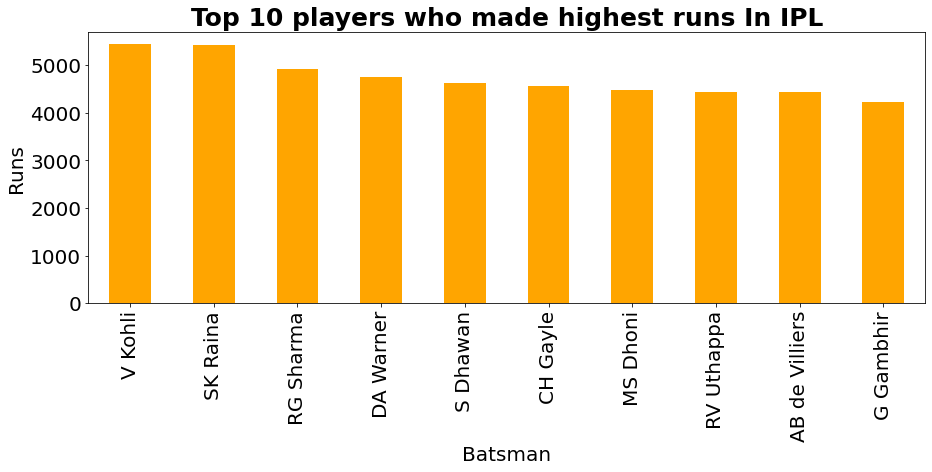

In [83]:
#Top 10 players having highest runa in IPL
complete_data.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False).head(10).plot(kind='bar',figsize=(15,5),color='orange')
plt.title('Top 10 players who made highest runs In IPL',fontsize=25,fontweight='bold')
plt.xlabel('Batsman',fontsize=20)
plt.ylabel('Runs',fontsize=20)
plt.xticks(size=20)
plt.yticks(size=20)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'SL Malinga'),
  Text(1, 0, 'DJ Bravo'),
  Text(2, 0, 'A Mishra'),
  Text(3, 0, 'Harbhajan Singh'),
  Text(4, 0, 'PP Chawla'),
  Text(5, 0, 'B Kumar'),
  Text(6, 0, 'R Ashwin'),
  Text(7, 0, 'SP Narine'),
  Text(8, 0, 'UT Yadav'),
  Text(9, 0, 'R Vinay Kumar')])

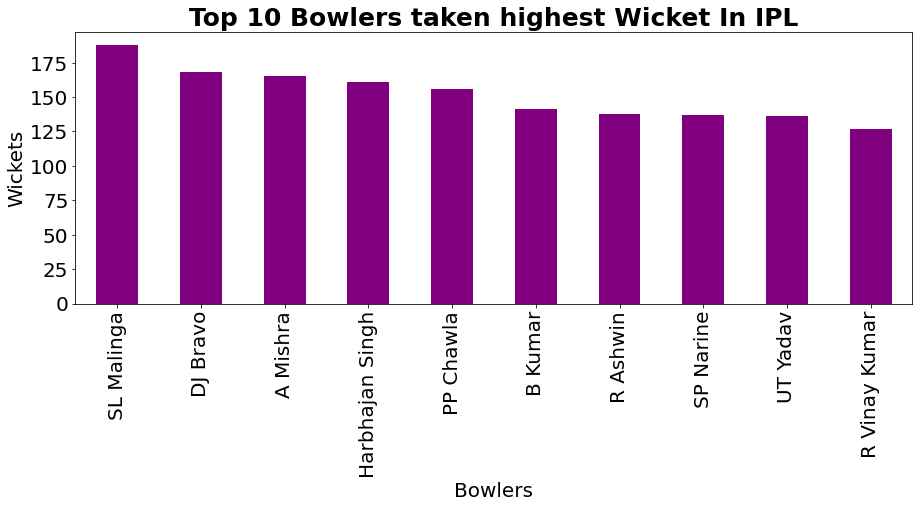

In [55]:
# Top Wicket Taker Bowlers In IPL
complete_data.groupby('bowler')['player_dismissed'].count().sort_values(ascending=False).head(10).plot(kind='bar',figsize=(15,5),color='purple')
plt.title('Top 10 Bowlers taken highest Wicket In IPL',fontsize=25,fontweight='bold')
plt.xlabel('Bowlers',fontsize=20)
plt.ylabel('Wickets',fontsize=20)
plt.yticks(size=20)
plt.xticks(size=20)

In [56]:
# we will print winner season wise
final_matches=Match_Data.drop_duplicates(subset=['season'], keep='last')

final_matches[['season','winner']].reset_index(drop=True).sort_values('season')

,season,winner
1,2008,Rajasthan Royals
2,2009,Deccan Chargers
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Kolkata Knight Riders
6,2013,Mumbai Indians
7,2014,Kolkata Knight Riders
8,2015,Mumbai Indians
9,2016,Sunrisers Hyderabad
0,2017,Mumbai Indians


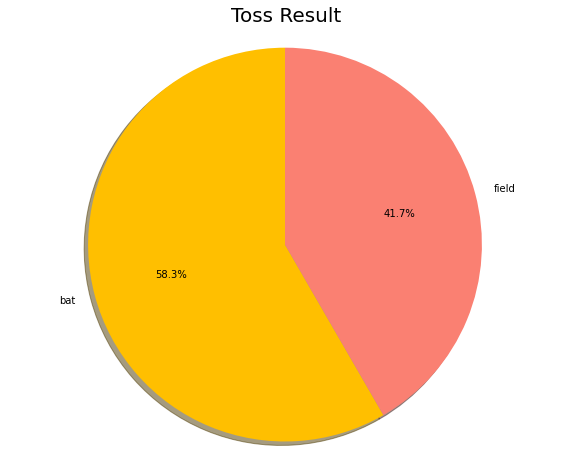

In [58]:
Toss=final_matches.toss_decision.value_counts()
labels=np.array(Toss.index)
sizes = Toss.values
colors = ['#FFBF00', '#FA8072']
plt.figure(figsize = (10,8))
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True,startangle=90)
plt.title('Toss Result',fontsize=20)
plt.axis('equal')
plt.show()

In [66]:
# we will print man of the match
final_matches[['winner','player_of_match']].reset_index(drop=True)

,winner,player_of_match
0,Mumbai Indians,KH Pandya
1,Rajasthan Royals,YK Pathan
2,Deccan Chargers,A Kumble
3,Chennai Super Kings,SK Raina
4,Chennai Super Kings,M Vijay
5,Kolkata Knight Riders,MS Bisla
6,Mumbai Indians,KA Pollard
7,Kolkata Knight Riders,MK Pandey
8,Mumbai Indians,RG Sharma
9,Sunrisers Hyderabad,BCJ Cutting


In [67]:
#we will print numbers of fours hit by team
four_hitten_data=complete_data[complete_data['batsman_runs']==4]
four_hitten_data.groupby('batting_team')['batsman_runs'].agg([('runs by fours','sum'),('fours','count')])

,runs by fours,fours
batting_team,,
Chennai Super Kings,8772,2193
Deccan Chargers,3828,957
Delhi Capitals,968,242
Delhi Daredevils,8632,2158
Gujarat Lions,1840,460
Kings XI Punjab,9832,2458
Kochi Tuskers Kerala,680,170
Kolkata Knight Riders,9736,2434
Mumbai Indians,10352,2588


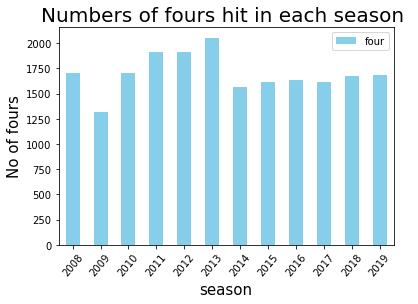

In [73]:
# we will plot graph on no of four hit in each season
ax=four_hitten_data.groupby('season')['batsman_runs'].agg([('four','count')]).reset_index().plot('season','four',kind='bar',color = 'skyblue')
plt.title("Numbers of fours hit in each season ",fontsize=20)
plt.xticks(rotation=50)
plt.xlabel("season",fontsize=15)
plt.ylabel("No of fours",fontsize=15)
plt.show()

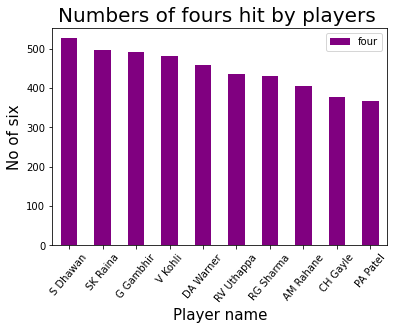

In [79]:
batsman_four=four_hitten_data.groupby('batsman')['batsman_runs'].agg([('four','count')]).reset_index().sort_values('four',ascending=0)
ax=batsman_four.iloc[:10,:].plot('batsman','four',kind='bar',color='purple')
plt.title("Numbers of fours hit by players ",fontsize=20)
plt.xticks(rotation=50)
plt.xlabel("Player name",fontsize=15)
plt.ylabel("No of six",fontsize=15)
plt.show()

In [74]:
# we will print no of sixes hit by team
six_hitten_data=complete_data[complete_data['batsman_runs']==6]
six_hitten_data.groupby('batting_team')['batsman_runs'].agg([('runs by six','sum'),('sixes','count')])

,runs by six,sixes
batting_team,,
Chennai Super Kings,5838,973
Deccan Chargers,2400,400
Delhi Capitals,522,87
Delhi Daredevils,4806,801
Gujarat Lions,930,155
Kings XI Punjab,5856,976
Kochi Tuskers Kerala,318,53
Kolkata Knight Riders,5580,930
Mumbai Indians,6576,1096


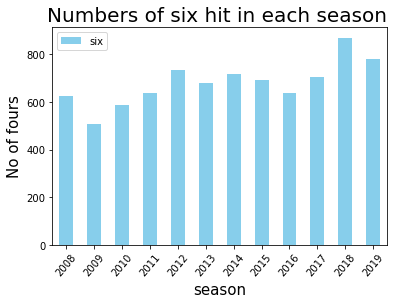

In [80]:
# we will plot graph on no of four hit in each season
ax=six_hitten_data.groupby('season')['batsman_runs'].agg([('six','count')]).reset_index().plot('season','six',kind='bar',color = 'skyblue')
plt.title("Numbers of six hit in each season ",fontsize=20)
plt.xticks(rotation=50)
plt.xlabel("season",fontsize=15)
plt.ylabel("No of fours",fontsize=15)
plt.show()

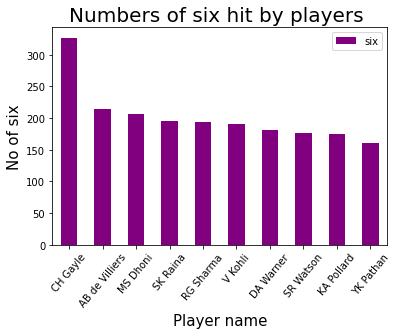

In [81]:
# we will plot graph of six hit by players
batsman_six=six_hitten_data.groupby('batsman')['batsman_runs'].agg([('six','count')]).reset_index().sort_values('six',ascending=0)
ax=batsman_six.iloc[:10,:].plot('batsman','six',kind='bar',color='purple')
plt.title("Numbers of six hit by players ",fontsize=20)
plt.xticks(rotation=50)
plt.xlabel("Player name",fontsize=15)
plt.ylabel("No of six",fontsize=15)
plt.show()

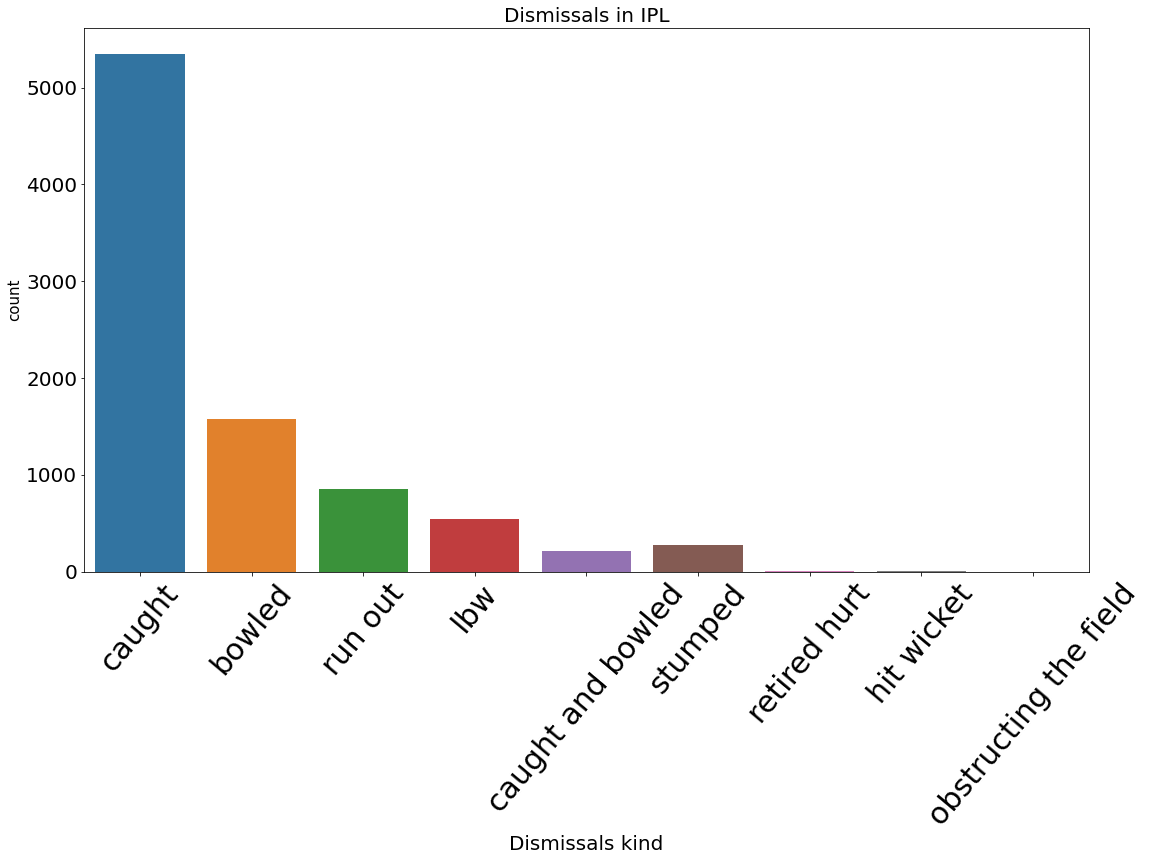

In [87]:
# Dismissals in IPL
plt.figure(figsize=(18,10))
ax=sns.countplot(Deliveries_Data.dismissal_kind)
plt.yticks(size=20)
plt.xticks(size=30)
plt.title("Dismissals in IPL",fontsize=20)
plt.xlabel("Dismissals kind",fontsize=20)
plt.ylabel("count",fontsize=15)
plt.xticks(rotation=50)
plt.show()

## Conclusion

#### •	Matches are played in seasons 2011,2012,2013 are more than other season
#### •	In seasons 2011,2012,2013 aproximatly 73 matches were played.
#### •	And other seasons aproximately 60 matches were played.
#### •	Conclusion on the base of team:
#### •	Mumbai indians won 4 ipl trophy.
#### •	Chennai super kings won 3 ipl trophy.
#### • 	Kolkata knight riders won 2 ipl trophy. 
#### •	Rajasthan royals,deccan chargers,sunrisers hydrabad were won 1 ipl trophy each.
#### •	Captain choose fielding after wining toss is nearly about 60%
#### •	From above countplot it has been clear that the team which choose field after winning toss has won     maximum time than who choose bat after winning toss.
#### •	Ch gayle and ab de villiers performance won most matches than others
#### •	Except ms dhoni all the batsmans are openers or came hitten for batting 2nd and 3rd number
#### •	Suresh raina have highest runs in ipl.
#### •	Sl malinga is the highest wicket taker in ipl.
#### •	In top 10 bowlers 5 are pacers and 5 are spinners.
#### •	In 5 pacers all are right arm pacers
#### •	In 5 spinners 3 are right arm and 2 are left arm spinners
#### •	Most of the fours are hit in 2013 season.
#### •	Shikhar dhawan have hit more fours than others.
#### •	Most of the six are hit in 2018 season.
#### •	Ch gayle have hit most six than others.
#### •	Dismissals in ipl was most by catch out .




